<a href="https://colab.research.google.com/github/isabelaacr/Ciencia_de_dados_2/blob/main/Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
x = np.array([50, 60, 70, 80, 90, 100]).reshape(-1, 1)
y = np.array([150, 180, 200, 240, 250, 280])

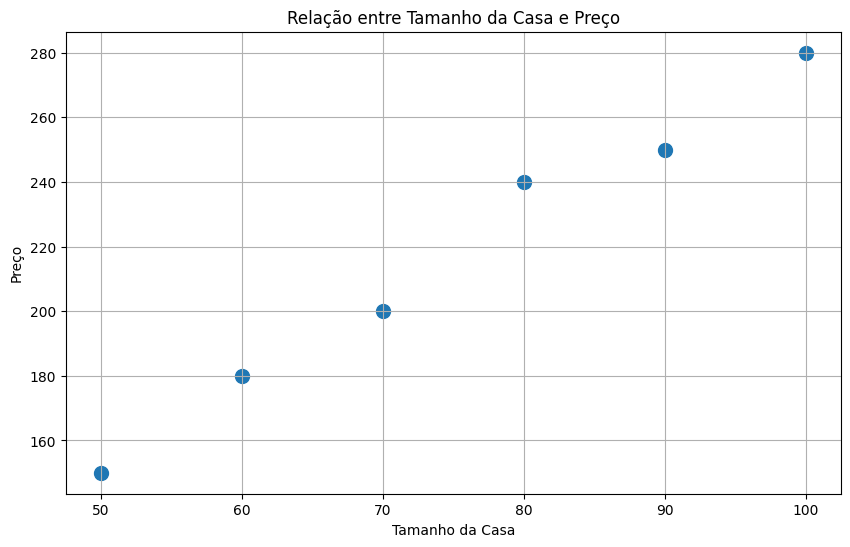

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y,s=100)
plt.title("Relação entre Tamanho da Casa e Preço")
plt.xlabel("Tamanho da Casa")
plt.ylabel("Preço")
plt.grid(True)
plt.show()

In [ ]:
modelo_simples = LinearRegression()
modelo_simples.fit(x, y)

LinearRegression()

In [ ]:
print ("Coeficiente angular (inclinação):", modelo_simples.coef_[0])
print ("Coeficiente linear (intercepto):", modelo_simples.coef_[0])


Coeficiente angular (inclinação): 2.571428571428572
Coeficiente linear (intercepto): 2.571428571428572


In [ ]:
X_novo = np.array([[65], [75]])
y_pred = modelo_simples.predict(X_novo)

In [ ]:
print (f"Previsão de preço para uma casa de 65m²: {y_pred[0]}")
print (f"Previsão de preço para uma casa de 75m²: {y_pred[1]}")

Previsão de preço para uma casa de 65m²: 190.95238095238093
Previsão de preço para uma casa de 75m²: 216.66666666666666


In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

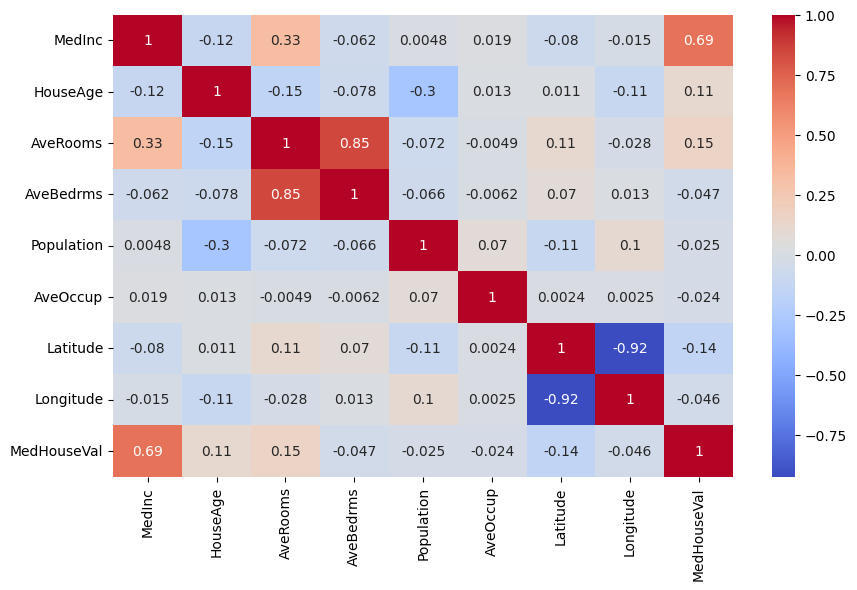

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [ ]:
features = ['MedInc']
x = df[features]
y = df['MedHouseVal']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalizado = scaler.fit_transform(x)

In [ ]:
modelo = LinearRegression()
modelo.fit(x_normalizado, y)

LinearRegression()

In [ ]:
print("Coeficientes do modelo de regressão linear:")
for feature, coef in zip(features, modelo.coef_):
    print(f"{feature}: {coef}")
print(f"Intercepto do modelo: {modelo.intercept_}")

Coeficientes do modelo de regressão linear:
MedInc: 0.7939893889648998
Intercepto do modelo: 2.068558169089147


In [ ]:
y_pred = modelo.predict(x_normalizado)

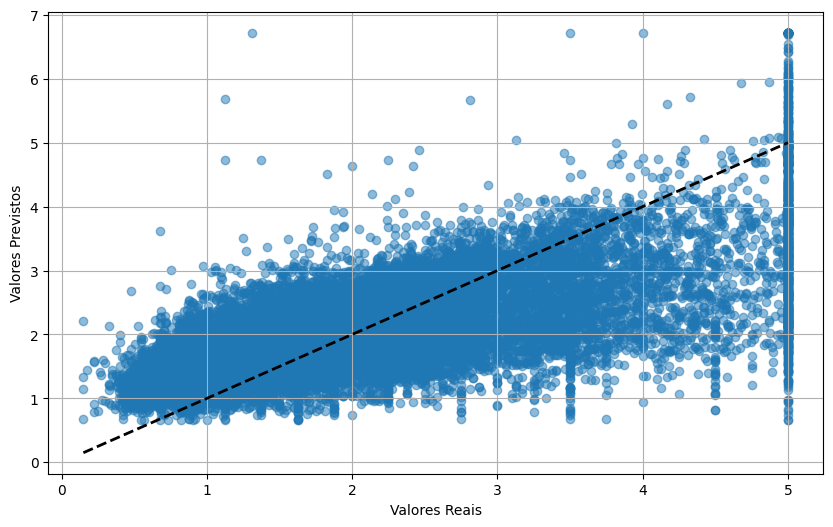

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.grid(True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Quadrático Médio (MSE): 0.7011311502929526
Coeficiente de Determinação (R²): 0.47344749180719903


In [4]:
features = ['MedInc', 'AveRooms']
x = [features]
y= ['MedHouseVal']